In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from IPython.display import display

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

filepath1 = "cleaned_data.csv"
filepath2 = "df_num.csv"
df1 = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           723 non-null    float64
 1   Hours per day                 723 non-null    float64
 2   While working                 721 non-null    object 
 3   Fav genre                     723 non-null    object 
 4   BPM                           620 non-null    float64
 5   Frequency [Classical]         723 non-null    object 
 6   Frequency [Country]           723 non-null    object 
 7   Frequency [EDM]               723 non-null    object 
 8   Frequency [Folk]              723 non-null    object 
 9   Frequency [Gospel]            723 non-null    object 
 10  Frequency [Hip hop]           723 non-null    object 
 11  Frequency [Jazz]              723 non-null    object 
 12  Frequency [K pop]             723 non-null    object 
 13  Frequ

In [2]:
df1

,Age,Hours per day,While working,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4.0,No,Video game music,132.0,Never,Never,Very frequently,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,61.0,2.5,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,18.0,4.0,Yes,R&B,107.0,Never,Never,Rarely,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18.0,5.0,Yes,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18.0,3.0,Yes,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,17.0,2.0,Yes,Rock,120.0,Very frequently,Rarely,Never,Sometimes,Never,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
719,18.0,1.0,Yes,Pop,160.0,Rarely,Rarely,Never,Never,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
720,19.0,6.0,Yes,Rap,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
721,19.0,5.0,Yes,Classical,170.0,Very frequently,Never,Never,Never,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [3]:
# Q3: Does the frequency of listening to different genres correlate with different 
# mental health disorders?

In [4]:
df1.columns

Index(['Age', 'Hours per day', 'While working', 'Fav genre', 'BPM',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects'],
      dtype='object')

In [5]:
freq_cols = ["BPM", "Fav genre", "Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
        "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]",
        "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]", "Anxiety", 
        "Depression", "Insomnia", "OCD"]

In [6]:
df_pies = df2[freq_cols]
df_pies = df_pies.sort_values(by="BPM", ascending=False).dropna(subset="BPM")
df_pies = df_pies.loc[df_pies["BPM"] > 0]

df_pies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, 634 to 423
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BPM                           620 non-null    float64
 1   Fav genre                     620 non-null    object 
 2   Frequency [Classical]         620 non-null    int64  
 3   Frequency [Country]           620 non-null    int64  
 4   Frequency [EDM]               620 non-null    int64  
 5   Frequency [Folk]              620 non-null    int64  
 6   Frequency [Gospel]            620 non-null    int64  
 7   Frequency [Hip hop]           620 non-null    int64  
 8   Frequency [Jazz]              620 non-null    int64  
 9   Frequency [K pop]             620 non-null    int64  
 10  Frequency [Latin]             620 non-null    int64  
 11  Frequency [Lofi]              620 non-null    int64  
 12  Frequency [Metal]             620 non-null    int64  
 13  Frequenc

In [7]:
bins = [0, 100, 120, 150, 200, 300, 630]
groups = ["<100", "100-119", "120-149", "150-199", "200-299", ">300"]
df_pies["BPM_groups"] = pd.cut(df_pies["BPM"], bins, labels=groups, include_lowest=True)
df_pies.head()

,BPM,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
634,624.0,EDM,2,0,3,0,0,0,0,1,...,0,0,0,0,2,4.0,7.0,1.0,3.0,>300
600,220.0,Rock,1,0,0,0,0,0,0,0,...,0,0,1,3,0,3.0,3.0,1.0,8.0,200-299
243,220.0,Metal,1,0,0,0,0,0,1,0,...,0,0,1,2,1,0.0,0.0,0.0,1.0,200-299
652,218.0,Metal,2,2,2,2,0,1,0,3,...,1,1,2,3,1,6.0,8.0,7.0,0.0,200-299
555,210.0,Metal,0,0,0,1,0,2,3,0,...,1,2,2,2,1,9.0,6.0,8.0,5.0,200-299


In [8]:
df_pies["BPM_groups"].value_counts()

BPM_groups
120-149    182
<100       163
100-119    162
150-199    105
200-299      7
>300         1
Name: count, dtype: int64

In [9]:
# Scatter plot of genre vs frequency of disorder

In [10]:
anxiety_df = df_pies.loc[df_pies.Anxiety >= 7.0].reset_index(drop=True)
anxiety_df

,BPM,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,210.0,Metal,0,0,0,1,0,2,3,0,...,1,2,2,2,1,9.0,6.0,8.0,5.0,200-299
1,210.0,Metal,0,0,3,0,0,1,0,0,...,1,0,1,3,2,8.0,6.0,7.0,0.0,200-299
2,208.0,Pop,0,0,0,0,0,1,0,1,...,3,0,3,3,3,7.0,6.0,3.0,1.0,200-299
3,200.0,Jazz,1,0,0,1,0,0,3,0,...,0,2,0,3,2,7.0,2.0,3.0,1.0,150-199
4,200.0,Jazz,0,0,2,1,0,2,3,1,...,1,2,1,0,0,9.0,4.0,4.0,4.0,150-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,60.0,Pop,1,0,2,3,0,3,2,1,...,3,3,2,3,1,7.0,2.0,0.0,7.0,<100
300,60.0,Video game music,3,0,0,1,1,0,0,0,...,0,0,0,0,3,8.0,4.0,3.0,3.0,<100
301,55.0,Classical,3,1,0,1,1,0,2,0,...,0,0,0,2,2,8.0,8.0,9.0,3.0,<100
302,20.0,Hip hop,1,0,1,0,1,3,1,3,...,2,3,3,0,0,10.0,7.0,2.0,0.0,<100


In [11]:
anxiety_df["Fav genre"].value_counts()

Fav genre
Rock                85
Pop                 45
Metal               31
Video game music    18
Hip hop             18
Classical           17
EDM                 15
Folk                14
K pop               13
Country             12
R&B                 11
Jazz                 9
Rap                  8
Lofi                 6
Latin                1
Gospel               1
Name: count, dtype: int64

In [12]:
anxiety_top = {"Rock": 106, "Pop": 54, "Metal": 41}
anxiety_total = sum(anxiety_top.values())
anxiety_perc = {key: (value / anxiety_total) * 100 for key, value in anxiety_top.items()}
anxiety_perc

{'Rock': 52.736318407960205,
 'Pop': 26.865671641791046,
 'Metal': 20.398009950248756}

<function matplotlib.pyplot.show(close=None, block=None)>

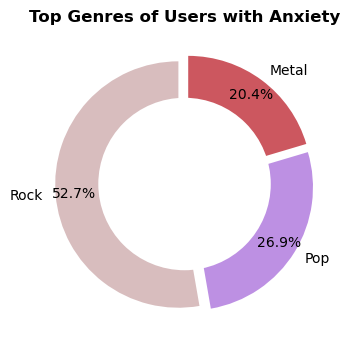

In [13]:
# Donut chart
colors = ("#D8BDBE", "#BD90E3", "#CC575F")

explode = [0.05, 0.05, 0.05]

plt.figure(figsize=(6, 4))

plt.pie(anxiety_perc.values(), explode=explode, labels=anxiety_perc.keys(), colors=colors, autopct="%1.1f%%", 
        shadow=False, startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Top Genres of Users with Anxiety", fontweight="bold", fontsize=12)
plt.axis=("equal")

plt.show

In [14]:
anxiety_df["BPM"].value_counts()

BPM
120.0    17
140.0    15
150.0    11
110.0     8
80.0      8
         ..
94.0      1
208.0     1
116.0     1
167.0     1
8.0       1
Name: count, Length: 103, dtype: int64

In [15]:
depression_df = df_pies.loc[df_pies.Depression >= 7.0].reset_index(drop=True)
depression_df

,BPM,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,624.0,EDM,2,0,3,0,0,0,0,1,...,0,0,0,0,2,4.0,7.0,1.0,3.0,>300
1,218.0,Metal,2,2,2,2,0,1,0,3,...,1,1,2,3,1,6.0,8.0,7.0,0.0,200-299
2,200.0,Rock,1,1,0,1,0,1,1,0,...,2,0,1,3,0,8.0,9.0,6.0,2.0,150-199
3,194.0,Rock,1,2,1,1,0,2,2,1,...,2,1,1,3,2,6.0,8.0,1.0,6.0,150-199
4,194.0,Metal,0,1,2,2,0,2,1,1,...,3,2,2,3,2,8.0,8.0,3.0,0.0,150-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,66.0,Rock,1,1,0,3,0,2,2,0,...,3,3,2,3,0,10.0,7.0,0.0,10.0,<100
214,63.0,Folk,0,1,2,3,0,1,1,0,...,1,1,1,3,2,8.0,7.0,7.0,3.0,<100
215,55.0,Classical,3,1,0,1,1,0,2,0,...,0,0,0,2,2,8.0,8.0,9.0,3.0,<100
216,20.0,Hip hop,1,0,1,0,1,3,1,3,...,2,3,3,0,0,10.0,7.0,2.0,0.0,<100


In [16]:
depression_df["Depression"].value_counts()

Depression
7.0     82
8.0     65
10.0    39
9.0     32
Name: count, dtype: int64

In [17]:
dep_rank = {7: 82, 8: 65, 9: 32, 10: 39}
dep_rank_tot = sum(dep_rank.values())
dep_perc_2 = {key: (value / dep_rank_tot) * 100 for key, value in dep_rank.items()}
dep_perc_2

{7: 37.61467889908257,
 8: 29.81651376146789,
 9: 14.678899082568808,
 10: 17.889908256880734}

In [18]:
depression_df["Fav genre"].value_counts()

Fav genre
Rock                63
Metal               28
Pop                 23
Hip hop             19
EDM                 15
Classical           11
Folk                11
Video game music     9
K pop                8
Jazz                 8
R&B                  7
Lofi                 6
Country              5
Rap                  4
Gospel               1
Name: count, dtype: int64

In [19]:
depression_top = {"Rock": 78, "Pop": 33, "Metal": 30}
depression_total = sum(depression_top.values())
depression_perc = {key: (value / depression_total) * 100 for key, value in depression_top.items()}
depression_perc

{'Rock': 55.319148936170215,
 'Pop': 23.404255319148938,
 'Metal': 21.27659574468085}

<function matplotlib.pyplot.show(close=None, block=None)>

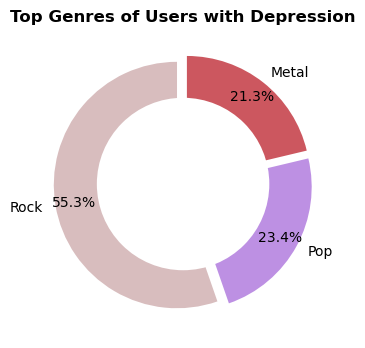

In [20]:
# Donut chart
colors = ("#D8BDBE", "#BD90E3", "#CC575F")

explode = [0.05, 0.05, 0.05]

plt.figure(figsize=(6, 4))

plt.pie(depression_perc.values(), explode=explode, labels=depression_perc.keys(), colors=colors, autopct="%1.1f%%", 
        shadow=False, startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Top Genres of Users with Depression", fontweight="bold", fontsize=12)
plt.axis=("equal")

plt.show

In [21]:
depression_df["BPM"].value_counts()

BPM
120.0    17
140.0    12
150.0    12
90.0      6
130.0     5
         ..
117.0     1
114.0     1
111.0     1
106.0     1
8.0       1
Name: count, Length: 88, dtype: int64

In [22]:
insomnia_df = df_pies.loc[df_pies.Insomnia >= 7.0].reset_index(drop=True)
insomnia_df

,BPM,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,218.0,Metal,2,2,2,2,0,1,0,3,...,1,1,2,3,1,6.0,8.0,7.0,0.0,200-299
1,210.0,Metal,0,0,0,1,0,2,3,0,...,1,2,2,2,1,9.0,6.0,8.0,5.0,200-299
2,210.0,Metal,0,0,3,0,0,1,0,0,...,1,0,1,3,2,8.0,6.0,7.0,0.0,200-299
3,200.0,Metal,2,1,0,0,0,1,2,0,...,1,0,1,3,2,7.0,4.0,7.0,0.0,150-199
4,190.0,Metal,1,0,1,0,0,2,0,0,...,1,0,2,3,2,6.0,9.0,9.0,0.0,150-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,70.0,Metal,1,0,1,2,0,0,0,0,...,2,0,0,3,3,8.0,3.0,9.0,2.0,<100
147,68.0,Classical,3,0,0,0,0,0,1,0,...,1,0,0,1,0,4.0,8.0,9.0,1.0,<100
148,63.0,Folk,0,1,2,3,0,1,1,0,...,1,1,1,3,2,8.0,7.0,7.0,3.0,<100
149,55.0,Classical,3,1,0,1,1,0,2,0,...,0,0,0,2,2,8.0,8.0,9.0,3.0,<100


In [23]:
insomnia_df["Fav genre"].value_counts()

Fav genre
Rock                37
Metal               27
Pop                 15
Video game music    12
Classical           11
EDM                 10
Jazz                 7
Folk                 7
Hip hop              6
K pop                5
Lofi                 4
R&B                  4
Gospel               2
Country              2
Latin                1
Rap                  1
Name: count, dtype: int64

In [24]:
insomnia_top = {"Rock": 45, "Pop": 17, "Metal": 31}
insomnia_total = sum(insomnia_top.values())
insomnia_perc = {key: (value / insomnia_total) * 100 for key, value in insomnia_top.items()}
insomnia_perc

{'Rock': 48.38709677419355,
 'Pop': 18.27956989247312,
 'Metal': 33.33333333333333}

<function matplotlib.pyplot.show(close=None, block=None)>

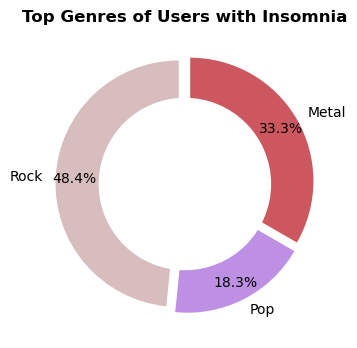

In [25]:
# Donut chart
colors = ("#D8BDBE", "#BD90E3", "#CC575F")

explode = [0.05, 0.05, 0.05]

plt.figure(figsize=(6, 4))

plt.pie(insomnia_perc.values(), explode=explode, labels=insomnia_perc.keys(), colors=colors, autopct="%1.1f%%", 
        shadow=False, startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Top Genres of Users with Insomnia", fontweight="bold", fontsize=12)
plt.axis=("equal")

plt.show

In [26]:
insomnia_df["BPM"].value_counts()

BPM
120.0    11
130.0     6
140.0     6
150.0     5
174.0     5
         ..
129.0     1
116.0     1
111.0     1
106.0     1
8.0       1
Name: count, Length: 75, dtype: int64

In [27]:
ocd_df = df_pies.loc[df_pies.OCD >= 7.0].reset_index(drop=True)
ocd_df

,BPM,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,220.0,Rock,1,0,0,0,0,0,0,0,...,0,0,1,3,0,3.0,3.0,1.0,8.0,200-299
1,180.0,Video game music,2,0,2,3,0,0,0,1,...,1,0,0,3,3,9.0,5.0,0.0,7.0,150-199
2,178.0,Hip hop,1,2,2,1,0,3,0,0,...,3,1,3,2,1,8.0,5.0,3.0,8.0,150-199
3,174.0,EDM,2,0,3,0,0,2,0,2,...,2,0,0,2,2,9.0,7.0,5.0,7.0,150-199
4,174.0,Lofi,1,3,2,1,1,1,1,1,...,1,1,1,1,1,7.0,6.0,7.0,9.0,150-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,84.0,Rock,1,1,0,1,2,2,2,0,...,0,2,1,3,2,10.0,6.0,8.0,10.0,<100
78,81.0,Video game music,2,0,2,1,0,1,2,2,...,2,1,1,0,3,8.0,6.0,5.0,7.0,<100
79,80.0,Video game music,1,0,1,2,0,1,0,0,...,1,0,0,1,3,3.0,3.0,0.0,7.0,<100
80,66.0,Rock,1,1,0,3,0,2,2,0,...,3,3,2,3,0,10.0,7.0,0.0,10.0,<100


In [28]:
ocd_df["Fav genre"].value_counts()

Fav genre
Rock                23
Pop                 17
Metal                8
Video game music     6
EDM                  6
Hip hop              3
Lofi                 3
K pop                3
Rap                  3
Classical            3
Folk                 2
R&B                  2
Country              2
Jazz                 1
Name: count, dtype: int64

In [29]:
ocd_top = {"Rock": 28, "Pop": 19, "Metal": 10}
ocd_total = sum(ocd_top.values())
ocd_perc = {key: (value / ocd_total) * 100 for key, value in ocd_top.items()}
ocd_perc

{'Rock': 49.122807017543856,
 'Pop': 33.33333333333333,
 'Metal': 17.543859649122805}

<function matplotlib.pyplot.show(close=None, block=None)>

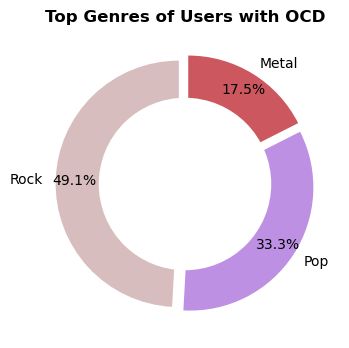

In [30]:
# Donut chart
colors = ("#D8BDBE", "#BD90E3", "#CC575F")

explode = [0.05, 0.05, 0.05]

plt.figure(figsize=(6, 4))

plt.pie(ocd_perc.values(), explode=explode, labels=ocd_perc.keys(), colors=colors, autopct="%1.1f%%", 
        shadow=False, startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Top Genres of Users with OCD", fontweight="bold", fontsize=12)
plt.axis=("equal")

plt.show

In [31]:
ocd_df["BPM"].value_counts()

BPM
120.0    6
140.0    5
150.0    4
107.0    3
110.0    3
174.0    3
145.0    3
91.0     2
112.0    2
101.0    2
121.0    2
96.0     2
130.0    2
134.0    2
135.0    2
105.0    2
90.0     2
162.0    2
95.0     1
87.0     1
86.0     1
85.0     1
97.0     1
84.0     1
81.0     1
102.0    1
103.0    1
104.0    1
80.0     1
66.0     1
220.0    1
117.0    1
108.0    1
141.0    1
178.0    1
171.0    1
160.0    1
159.0    1
156.0    1
155.0    1
149.0    1
137.0    1
109.0    1
136.0    1
128.0    1
125.0    1
119.0    1
180.0    1
115.0    1
114.0    1
60.0     1
Name: count, dtype: int64

In [32]:
total_frequency_sum = anxiety_df.filter(like='Frequency').sum(axis=0)

print(total_frequency_sum)

Frequency [Classical]           403
Frequency [Country]             252
Frequency [EDM]                 335
Frequency [Folk]                332
Frequency [Gospel]              104
Frequency [Hip hop]             434
Frequency [Jazz]                326
Frequency [K pop]               236
Frequency [Latin]               188
Frequency [Lofi]                355
Frequency [Metal]               375
Frequency [Pop]                 644
Frequency [R&B]                 401
Frequency [Rap]                 434
Frequency [Rock]                647
Frequency [Video game music]    400
dtype: int64


In [33]:
total_frequency_sum = depression_df.filter(like='Frequency').sum(axis=0)

print(total_frequency_sum)

Frequency [Classical]           292
Frequency [Country]             164
Frequency [EDM]                 251
Frequency [Folk]                234
Frequency [Gospel]               74
Frequency [Hip hop]             336
Frequency [Jazz]                240
Frequency [K pop]               171
Frequency [Latin]               150
Frequency [Lofi]                234
Frequency [Metal]               297
Frequency [Pop]                 452
Frequency [R&B]                 305
Frequency [Rap]                 338
Frequency [Rock]                486
Frequency [Video game music]    279
dtype: int64


In [34]:
total_frequency_sum = insomnia_df.filter(like='Frequency').sum(axis=0)

print(total_frequency_sum)

Frequency [Classical]           225
Frequency [Country]             116
Frequency [EDM]                 188
Frequency [Folk]                163
Frequency [Gospel]               65
Frequency [Hip hop]             215
Frequency [Jazz]                181
Frequency [K pop]               120
Frequency [Latin]               119
Frequency [Lofi]                185
Frequency [Metal]               218
Frequency [Pop]                 300
Frequency [R&B]                 204
Frequency [Rap]                 216
Frequency [Rock]                326
Frequency [Video game music]    211
dtype: int64


In [35]:
total_frequency_sum = ocd_df.filter(like='Frequency').sum(axis=0)

print(total_frequency_sum)

Frequency [Classical]           106
Frequency [Country]              68
Frequency [EDM]                 109
Frequency [Folk]                 92
Frequency [Gospel]               34
Frequency [Hip hop]             121
Frequency [Jazz]                 81
Frequency [K pop]                68
Frequency [Latin]                57
Frequency [Lofi]                100
Frequency [Metal]               104
Frequency [Pop]                 177
Frequency [R&B]                 113
Frequency [Rap]                 111
Frequency [Rock]                173
Frequency [Video game music]    101
dtype: int64


In [36]:
results = {
    "Rock": [647, 486, 326, 173],
    "Pop": [644, 452, 300, 177],
    "Hip hop": [434, 336, 215, 121],
    "Rap": [434, 338, 216, 111],
    "Classical": [403, 292, 225, 106],
    "R&B": [401, 305, 204, 113],
    "Metal": [375, 297, 218, 104],
    "Video game music": [400, 279, 211, 101],
    "EDM": [335, 251, 188, 109],   
    "Lofi": [355, 234, 185, 100],
    "Jazz": [326, 240, 181, 81],
    "Folk": [332, 234, 163, 92],
    "Country": [252, 164, 116, 68],
    "K pop": [236, 171, 120, 68],
    "Latin": [188, 150, 119, 57],
    "Gospel": [104, 74, 65, 34]
}

sum_dict = {key: sum(values) for key, values in results.items()}

# Sort the dictionary by the sum of values
sorted_results = dict(sorted(sum_dict.items(), key=lambda x: x[1], reverse=True))
print(sorted_results)

{'Rock': 1632, 'Pop': 1573, 'Hip hop': 1106, 'Rap': 1099, 'Classical': 1026, 'R&B': 1023, 'Metal': 994, 'Video game music': 991, 'EDM': 883, 'Lofi': 874, 'Jazz': 828, 'Folk': 821, 'Country': 600, 'K pop': 595, 'Latin': 514, 'Gospel': 277}


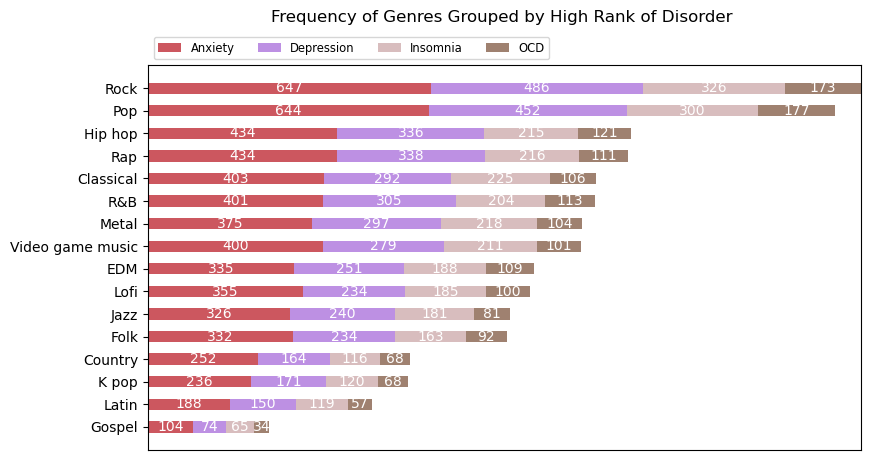

In [37]:
category_names = ["Anxiety", "Depression",
                  "Insomnia", "OCD"]

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = ["#CC575F", "#BD90E3", "#D8BDBE", "#9F8170"]

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color)

    category_colors = color
    text_color = 'white'
    ax.bar_label(rects, label_type='center', color=text_color)
ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='small')

plt.title("Frequency of Genres Grouped by High Rank of Disorder \n\n")
plt.savefig("Images/Genre_freq_vs_disorder.png")
plt.show()

In [38]:
anxiety_df["Fav genre"].value_counts()

Fav genre
Rock                85
Pop                 45
Metal               31
Video game music    18
Hip hop             18
Classical           17
EDM                 15
Folk                14
K pop               13
Country             12
R&B                 11
Jazz                 9
Rap                  8
Lofi                 6
Latin                1
Gospel               1
Name: count, dtype: int64

In [39]:
depression_df["Fav genre"].value_counts()

Fav genre
Rock                63
Metal               28
Pop                 23
Hip hop             19
EDM                 15
Classical           11
Folk                11
Video game music     9
K pop                8
Jazz                 8
R&B                  7
Lofi                 6
Country              5
Rap                  4
Gospel               1
Name: count, dtype: int64

In [40]:
insomnia_df["Fav genre"].value_counts()

Fav genre
Rock                37
Metal               27
Pop                 15
Video game music    12
Classical           11
EDM                 10
Jazz                 7
Folk                 7
Hip hop              6
K pop                5
Lofi                 4
R&B                  4
Gospel               2
Country              2
Latin                1
Rap                  1
Name: count, dtype: int64

In [41]:
ocd_df["Fav genre"].value_counts()

Fav genre
Rock                23
Pop                 17
Metal                8
Video game music     6
EDM                  6
Hip hop              3
Lofi                 3
K pop                3
Rap                  3
Classical            3
Folk                 2
R&B                  2
Country              2
Jazz                 1
Name: count, dtype: int64

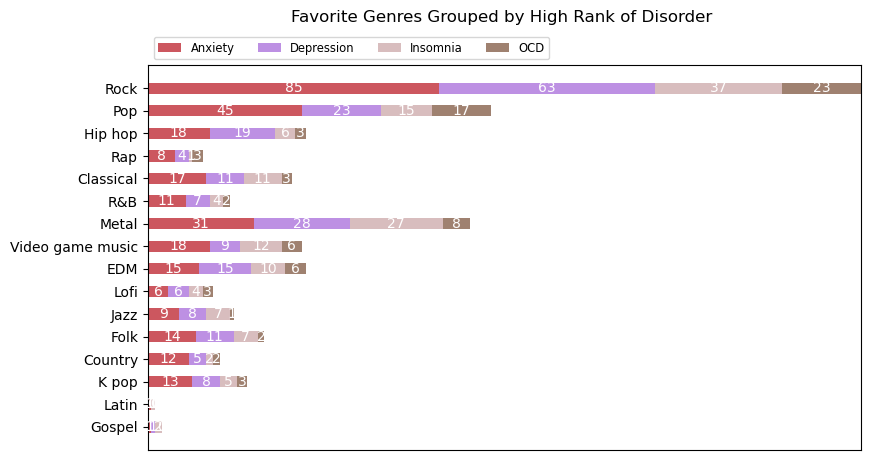

In [42]:
category_names = ["Anxiety", "Depression",
                  "Insomnia", "OCD"]

results = {
    "Rock": [85, 63, 37, 23],
    "Pop": [45, 23, 15, 17],
    "Hip hop": [18, 19, 6, 3],
    "Rap": [8, 4, 1, 3],
    "Classical": [17, 11, 11, 3],
    "R&B": [11, 7, 4, 2],
    "Metal": [31, 28, 27, 8],
    "Video game music": [18, 9, 12, 6],
    "EDM": [15, 15, 10, 6],
    "Lofi": [6, 6, 4, 3],
    "Jazz": [9, 8, 7, 1],
    "Folk": [14, 11, 7, 2],
    "Country": [12, 5, 2, 2],
    "K pop": [13, 8, 5, 3],
    "Latin": [ 1, 0, 1, 0],
    "Gospel": [1, 1, 2, 0]
}

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = ["#CC575F", "#BD90E3", "#D8BDBE", "#9F8170"]

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color)

    category_colors = color
    text_color = 'white' # if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color)
ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='small')

plt.title("Favorite Genres Grouped by High Rank of Disorder \n\n")
plt.savefig("Images/Genre_fav_vs_disorder.png")
plt.show()

In [43]:
mask = ((df_pies.Anxiety >= 7) | (df_pies.Depression >= 7) | (df_pies.Insomnia >= 7) | 
    (df_pies.OCD >= 7))
df_total = df_pies.loc[mask].reset_index(drop=True)
df_total

,BPM,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,624.0,EDM,2,0,3,0,0,0,0,1,...,0,0,0,0,2,4.0,7.0,1.0,3.0,>300
1,220.0,Rock,1,0,0,0,0,0,0,0,...,0,0,1,3,0,3.0,3.0,1.0,8.0,200-299
2,218.0,Metal,2,2,2,2,0,1,0,3,...,1,1,2,3,1,6.0,8.0,7.0,0.0,200-299
3,210.0,Metal,0,0,0,1,0,2,3,0,...,1,2,2,2,1,9.0,6.0,8.0,5.0,200-299
4,210.0,Metal,0,0,3,0,0,1,0,0,...,1,0,1,3,2,8.0,6.0,7.0,0.0,200-299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,60.0,Pop,1,0,2,3,0,3,2,1,...,3,3,2,3,1,7.0,2.0,0.0,7.0,<100
413,60.0,Video game music,3,0,0,1,1,0,0,0,...,0,0,0,0,3,8.0,4.0,3.0,3.0,<100
414,55.0,Classical,3,1,0,1,1,0,2,0,...,0,0,0,2,2,8.0,8.0,9.0,3.0,<100
415,20.0,Hip hop,1,0,1,0,1,3,1,3,...,2,3,3,0,0,10.0,7.0,2.0,0.0,<100


In [44]:
# New df: BPM groups vs value counts of disorders higher than 7?

In [45]:
df_total = df_total.rename(columns = {"Anxiety": "Anxiety Disorder", "Depression": "Depression Disorder", 
                 "Insomnia": "Insomnia Disorder", "OCD": "OCD Disorder"})

columns_to_include = df_total.filter(like="Disorder").columns.tolist() + ["BPM_groups"]
BPM_means = df_total[columns_to_include].groupby("BPM_groups").mean().sort_values(by="BPM_groups", ascending=False)

BPM_means = BPM_means.rename(columns = {"Anxiety Disorder": "Anxiety", 
    "Depression Disorder": "Depression", "Insomnia Disorder": "Insomnia", 
    "OCD Disorder": "OCD"})
BPM_means

C:\Users\redra\AppData\Local\Temp\ipykernel_28344\2684223052.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  BPM_means = df_total[columns_to_include].groupby("BPM_groups").mean().sort_values(by="BPM_groups", ascending=False)


,Anxiety,Depression,Insomnia,OCD
BPM_groups,,,,
>300,4.000000,7.000000,1.000000,3.000000
200-299,6.600000,5.800000,5.200000,2.800000
150-199,7.434783,5.956522,4.550725,2.840580
120-149,6.933071,6.350394,5.244094,3.374016
100-119,7.097345,5.982301,4.787611,3.495575
<100,6.931373,6.044118,4.387255,3.151961


In [46]:
BPM_means.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 6 entries, >300 to <100
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Anxiety     6 non-null      float64
 1   Depression  6 non-null      float64
 2   Insomnia    6 non-null      float64
 3   OCD         6 non-null      float64
dtypes: float64(4)
memory usage: 418.0 bytes


In [47]:
BPM_means = BPM_means.apply(pd.to_numeric, downcast='float')
BPM_means = BPM_means.round(2)
BPM_means

,Anxiety,Depression,Insomnia,OCD
BPM_groups,,,,
>300,4.00,7.00,1.00,3.00
200-299,6.60,5.80,5.20,2.80
150-199,7.43,5.96,4.55,2.84
120-149,6.93,6.35,5.24,3.37
100-119,7.10,5.98,4.79,3.50
<100,6.93,6.04,4.39,3.15


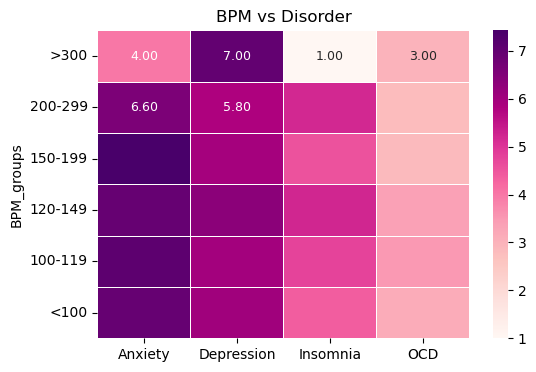

In [76]:
plt.figure(figsize=(6, 4))

sns.heatmap(BPM_means, annot=True, annot_kws={"size": 9}, fmt=".2f", cmap="RdPu", linewidths=.5)
plt.title("BPM vs Disorder")
plt.savefig("Images/BPM_vs_disorder.png")
plt.show()

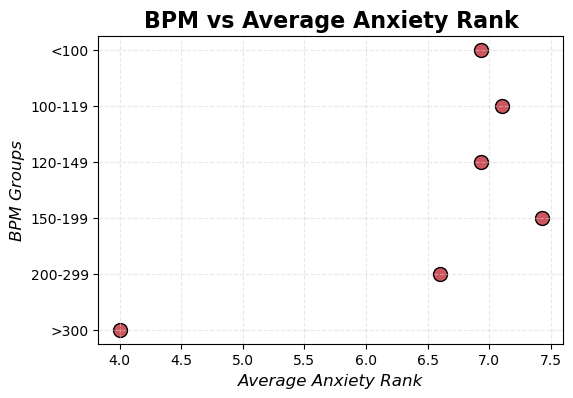

In [60]:
BPM_means_2 = BPM_means.reset_index()
x = BPM_means_2.Anxiety
y = BPM_means_2.BPM_groups

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(6, 4))
plt.scatter(x, y, facecolor="#CC575F", edgecolor="black", s=100)
# plt.plot(x, regress_values, "#CC575F")

plt.xlabel("Average Anxiety Rank", fontsize=12, fontstyle="italic")
plt.ylabel("BPM Groups", fontsize=12, fontstyle="italic")
plt.title("BPM vs Average Anxiety Rank", fontweight="bold", fontsize=16)
# plt.annotate(line_eq,(9, 11.5),fontsize=15,color="#CC575F")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.savefig("Images/BPM_vs_anxiety_rank.png")
plt.show()

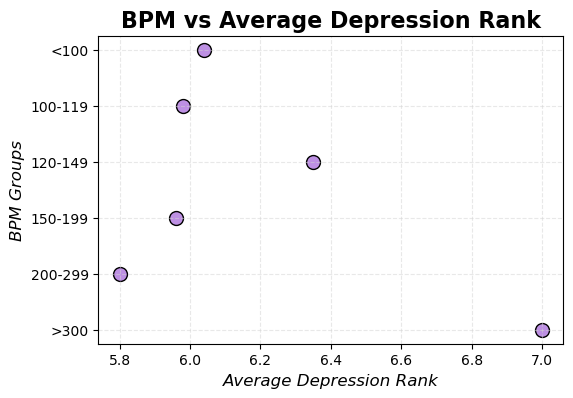

In [61]:
BPM_means_2 = BPM_means.reset_index()
x = BPM_means_2.Depression
y = BPM_means_2.BPM_groups

plt.figure(figsize=(6, 4))
plt.scatter(x, y, facecolor="#BD90E3", edgecolor="black", s=100)

plt.xlabel("Average Depression Rank", fontsize=12, fontstyle="italic")
plt.ylabel("BPM Groups", fontsize=12, fontstyle="italic")
plt.title("BPM vs Average Depression Rank", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.savefig("Images/BPM_vs_depression_rank.png")
plt.show()

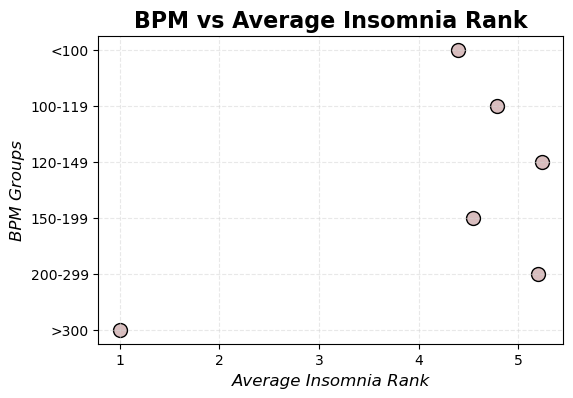

In [62]:
BPM_means_2 = BPM_means.reset_index()
x = BPM_means_2.Insomnia
y = BPM_means_2.BPM_groups

plt.figure(figsize=(6, 4))
plt.scatter(x, y, facecolor="#D8BDBE", edgecolor="black", s=100)

plt.xlabel("Average Insomnia Rank", fontsize=12, fontstyle="italic")
plt.ylabel("BPM Groups", fontsize=12, fontstyle="italic")
plt.title("BPM vs Average Insomnia Rank", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.savefig("Images/BPM_vs_insomnia_rank.png")
plt.show()

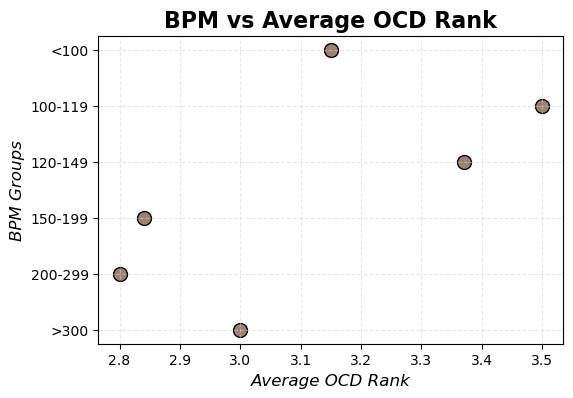

In [63]:
BPM_means_2 = BPM_means.reset_index()
x = BPM_means_2.OCD
y = BPM_means_2.BPM_groups

plt.figure(figsize=(6, 4))
plt.scatter(x, y, facecolor="#9F8170", edgecolor="black", s=100)

plt.xlabel("Average OCD Rank", fontsize=12, fontstyle="italic")
plt.ylabel("BPM Groups", fontsize=12, fontstyle="italic")
plt.title("BPM vs Average OCD Rank", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.savefig("Images/BPM_vs_ocd_rank.png")
plt.show()